<a href="https://colab.research.google.com/github/LeilaMo/Effective_DataVisualization_using_PlotlyExpress/blob/main/Part7_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import PIL
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#pip install plotly==4.5.2

### Mounting Google Drive in Google Colab

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
ls /content/drive/MyDrive/effective_data_visualization_using_plotly_express-main/data

all_stocks_5yr.csv     Iris.csv
apple_stock_price.csv  share-of-individuals-using-the-internet.csv
clean_auto_mpg.csv     tips.csv
gapminder_2007.csv     vgsales.csv
gapminder.csv          world_happiness_ranking_2019.csv


### **Readme**
In the following document as a mini project, i tried to do Data Analysis for video game sales Dataset. 

Enjoy improving your visualization skills!


### Part 1 - Videogame Sales Dataset

In [5]:
df = pd.read_csv ("/content/drive/MyDrive/effective_data_visualization_using_plotly_express-main/data/vgsales.csv")

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.shape

(16598, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
# To check if there is a null datapoint in the Dataset
df.isnull().values.any()

True

In [10]:
# Shows the number of missing values fo each column
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# Shows the total number of missing values in the DataFrame
df.isnull().sum().sum()

329

In [12]:
#Drop the rows with missing values
df = df.dropna(axis=0)

In [13]:
df.shape

(16291, 11)

In [14]:
#Check if there is any doublicate row
duplicateRows = df[df.duplicated() ]

In [15]:
duplicateRows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


####Exploring the Data

In [16]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
df.Name.value_counts()

Need for Speed: Most Wanted                              12
LEGO Marvel Super Heroes                                  9
FIFA 14                                                   9
Ratatouille                                               9
FIFA Soccer 13                                            8
                                                         ..
Virtua Fighter CG Portrait Series Vol.1: Sarah Bryant     1
TV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.5     1
Dance Dance Revolution: Hottest Party 3                   1
Orphen: Scion of Sorcery                                  1
Link's Crossbow Training                                  1
Name: Name, Length: 11325, dtype: int64

In [18]:
df.Platform.value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

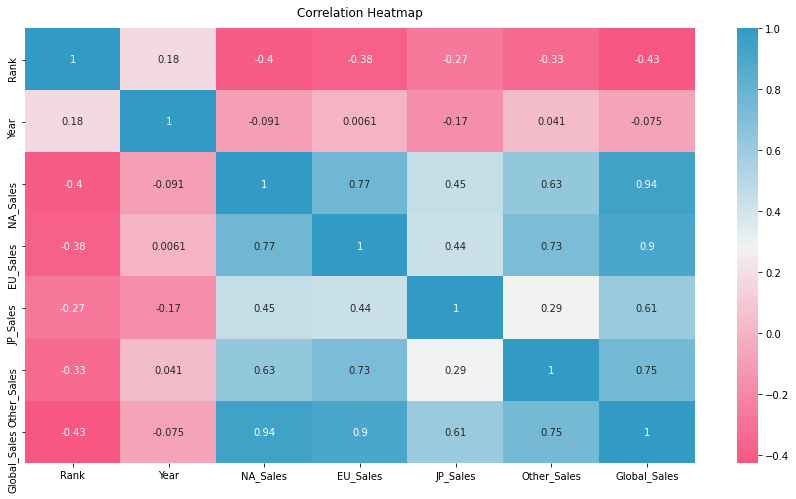

In [19]:
plt.figure(figsize=(15,8))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
heatmap = sns.heatmap(df.corr(), annot=True, cmap= cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

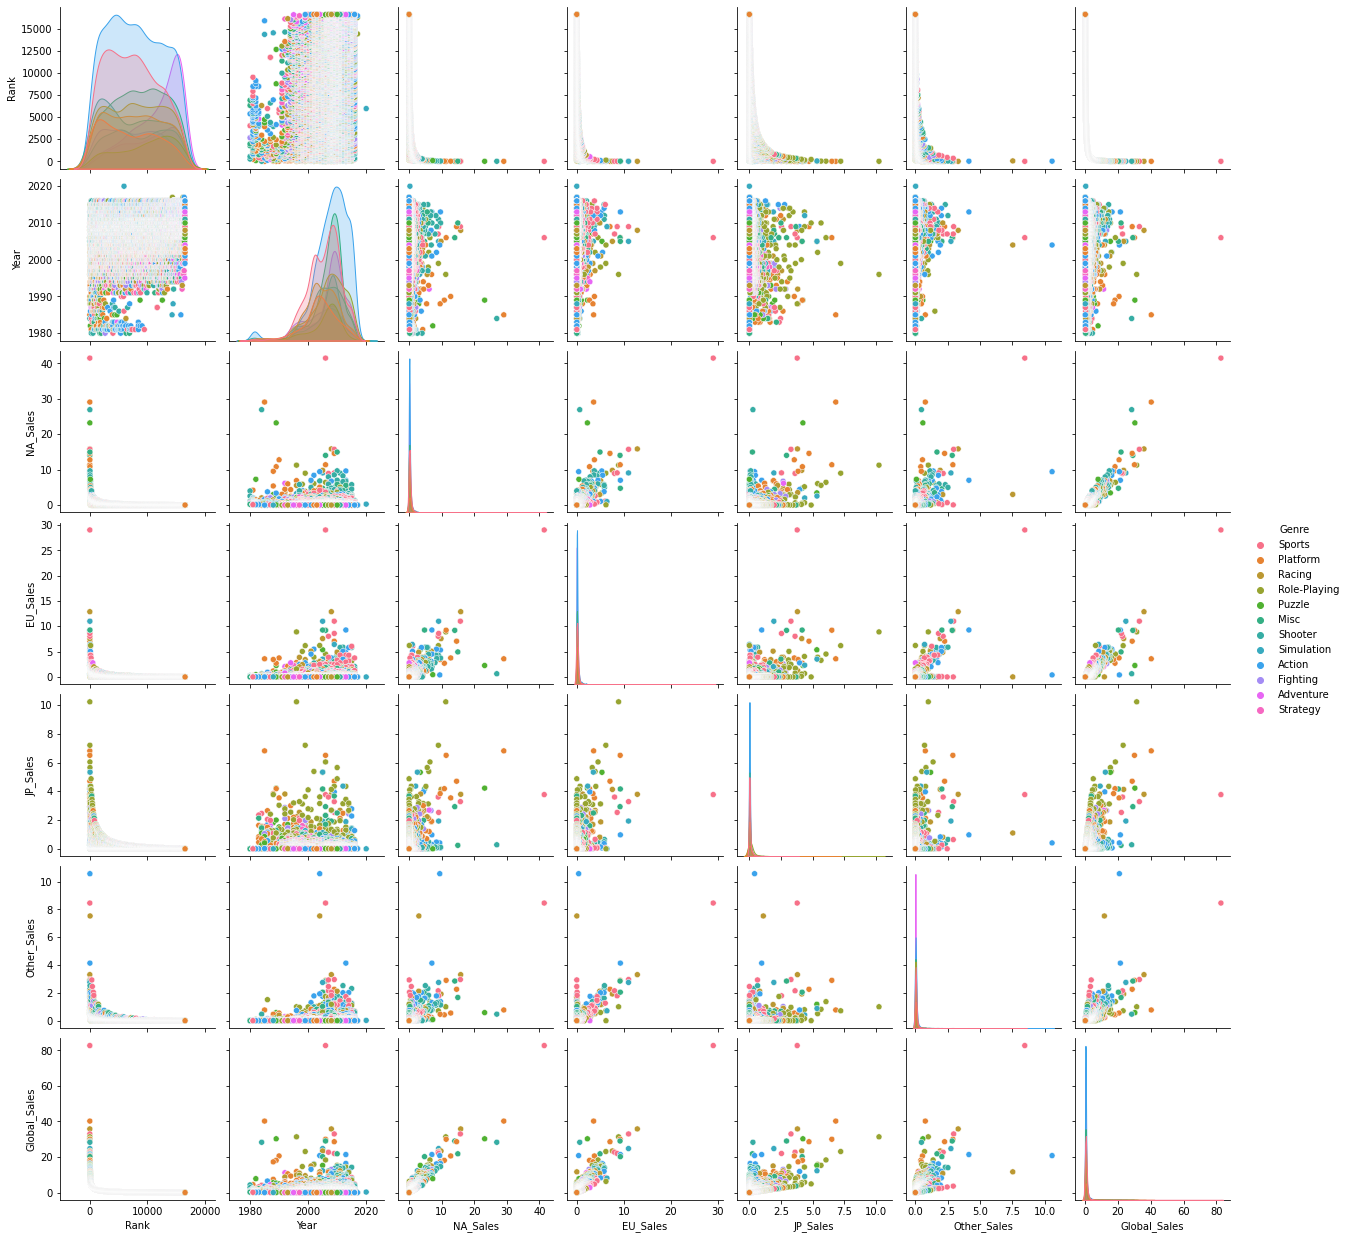

In [49]:
sns.pairplot(df, hue="Genre")

In [21]:
plot = px.scatter(
               data_frame = df, 
               x = "Year", 
               y = "Global_Sales",  
               color = "Platform",
               title = "Golbal sales of video games over years via different platforms", 

)

plot.show()

In [22]:
plot = px.scatter(
               data_frame = df, 
               x = "Year", 
               y = "Global_Sales", 
               size = "Global_Sales", 
               hover_name = "Genre", 
               color = "Genre",
               facet_row = "Genre", 
               title = "Golbal sales of video games with different genres over years", 
               width=800, height=2000

)
plot.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    #paper_bgcolor="LightSteelBlue",
)
plot.show()

In [23]:
plot = px.pie(
              data_frame = df, 
              names = "Genre", 
              values = "NA_Sales", 
              title = "Sales percentage of video games with different genres in North America",

              )
plot.show()

In [24]:
plot = px.pie(
              data_frame = df, 
              names = "Genre", 
              values = "EU_Sales", 
              title = "Sales percentage of video games with different genres in Europe",

              )
plot.show()

In [25]:
plot = px.pie(
              data_frame = df, 
              names = "Genre", 
              values = "JP_Sales", 
              title = "Sales percentage of video games with different genres in Japan",

              )
plot.show()

In [26]:
plot = px.pie(
              data_frame = df, 
              names = "Genre", 
              values = "Other_Sales", 
              title = "Sales percentage of video games with different genres in other parts of the world",

              )
plot.show()

In [27]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
plot = px.sunburst(
                   data_frame = df,
                   values = "Global_Sales", 
                   path = ["Genre", "Platform"], 
                   color = "Genre", 
                   title = "Distribution of global sales of variuos video game genres via different platforms", 
                      
)

plot.show()

In [37]:
plot = px.treemap(
                  data_frame = df, 
                  path=["Genre", "Platform"], 
                  values = "NA_Sales", 
                  color = "Genre",
                  title  ="Treemap for video game sales with various genres via different platforms in North America", 
)

plot.show()

In [38]:
plot = px.treemap(
                  data_frame = df, 
                  path=["Genre", "Platform"], 
                  values = "EU_Sales", 
                  color = "Genre",
                  title  ="Treemap for video game sales with various genres via different platforms in Europe", 
)

plot.show()

In [39]:
plot = px.treemap(
                  data_frame = df, 
                  path=["Platform", "Genre"], 
                  values = "Global_Sales", 
                  color = "NA_Sales",
                  title  ="Treemap for global sales of video games with various genres via different platforms in North America", 
)

plot.show()

In [40]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
plot = px.scatter(
               data_frame = df, 
               x = "Global_Sales",
               y = "EU_Sales", 
               size = "Global_Sales", 
               hover_name = "Publisher", 
               color = "Genre",
               animation_frame = "Year",
               title = "Europe sales of video game vs global sales per year", 

)

plot.show()

In [48]:
plot = px.violin(data_frame=df, 
                 x = "Genre", 
                 y = "EU_Sales",
                 color = "Platform", 
                 box = True,            
                 title = "Sales of video games through different platforms in Europe")

plot.show()